In [1]:
# Mount Google Driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install git+https://github.com/Cupcakus/pafy
!pip install youtube_dl

  Cloning https://github.com/Cupcakus/pafy to /tmp/pip-req-build-zxyxxw0x
  Running command git clone -q https://github.com/Cupcakus/pafy /tmp/pip-req-build-zxyxxw0x
  Created wheel for pafy: filename=pafy-0.5.5-py2.py3-none-any.whl size=35757 sha256=d6c3b72500804a200605abe6aaa60130b94304b4b39f9d2233e5da58c3c383d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-rmbbg4tk/wheels/93/1a/52/3c75e2f35b4aac122bcb0a64c08339224a76eafef3f150b9db
Successfully built pafy


In [4]:
import numpy as np
import torch
from torchvision import transforms
from torchvision.utils import draw_bounding_boxes
import cv2, pafy

In [5]:
# Load YOLOv5 model
detected_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-2-6 torch 1.10.0+cu111 CPU



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
# image_array has shape (H, W, 3)
def objectDetector(image_array):
  # Using the detected model to detect the object
  detected_results = detected_model(image_array)

  # Get the bounding boxes (xmin, ymin, xmax, ymax) and their labels
  bbox=detected_results.xyxy[0][:,:4]
  detected_labels = detected_results.pandas().xyxy[0].name.tolist()

  # transforms.ToTensor() convert numpy.ndarray (H x W x C) in the range [0, 255] 
  # to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] 
  img_tensor=transforms.ToTensor()(image_array)*255
  # Convert to uint8
  img_tensor=img_tensor.type(torch.uint8)  

  # draw bounding boxes on the input image
  img_bb=draw_bounding_boxes(img_tensor, bbox, width=3, labels=detected_labels,colors= (0,255,0))
  # Convert from (C x H x W) to (H x W x C) numpy
  img_bb=np.transpose(img_bb,(1,2,0)).numpy()

  return img_bb


In [ ]:
# Working directory and data directory
working_dir='drive/MyDrive/Deeplearning_Colab/ComputerVision/'
data_dir=working_dir+'data/'

# Load Youtube video from its url
url   = "https://www.youtube.com/watch?v=ORrrKXGx2SE&ab_channel=MuhammedJamnas"
youtube_video = pafy.new(url).getbest(preftype="mp4")
video = cv2.VideoCapture(youtube_video.url)
#video = cv2.VideoCapture(0) #use this for webcam

# Define the resolutions of saved video
frame_width = int(video.get(3))
frame_height = int(video.get(4))   
size = (frame_width, frame_height)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter(data_dir+'Yolo_output.avi', fourcc, 20, size)
count=0
# Process each frame of the video
while True:
    read_success, frame = video.read()

    if(read_success):     
        # Detect object in each frame
        objectDetected_frame = objectDetector(frame)

        # write the frame with detected boxes and labels
        out.write(objectDetected_frame)
        
    else:
        break

# Release resources and destroy all windows
video.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
from PIL import Image
from urllib.request import urlopen
from matplotlib import pyplot as plt

In [ ]:
# input: url of the image
def img_objectDectector(detected_model, img_url):
  # Read the image and convert to the 
  img = Image.open(urlopen(img_url))
  # Convert to the tensor of shape (C x H x W), dtype uint8 and value between 0 and 255 for the input of draw_bounding_boxes function
  convert_tensor = transforms.ToTensor()
  img_tensor=convert_tensor(img)*255
  img_tensor=img_tensor.type(torch.uint8)

  # Using the detected model to detect the object
  detected_results = detected_model(img_url)

  # Get the bounding boxes (xmin, ymin, xmax, ymax) and their labels
  bbox=detected_results.xyxy[0][:,:4]
  detected_labels = detected_results.pandas().xyxy[0].name.tolist()

  # draw bounding boxes on the input image
  # img_bb=draw_bounding_boxes(img_tensor, bbox, width=3, labels=['cat', 'dog'] ,colors=[(255,0,0),(0,255,0)])
  img_bb=draw_bounding_boxes(img_tensor, bbox, width=3, labels=detected_labels,colors= (0,255,0))
  img_final = torchvision.transforms.ToPILImage()(img_bb)

  return img_final


In [ ]:
img_url= 'https://static01.nyt.com/images/2020/06/22/opinion/20gillisWeb/merlin_173526783_192e498a-5699-411c-b1e5-64fa738eec17-superJumbo.jpg'
img_final=img_objectDectector(model,img_url)

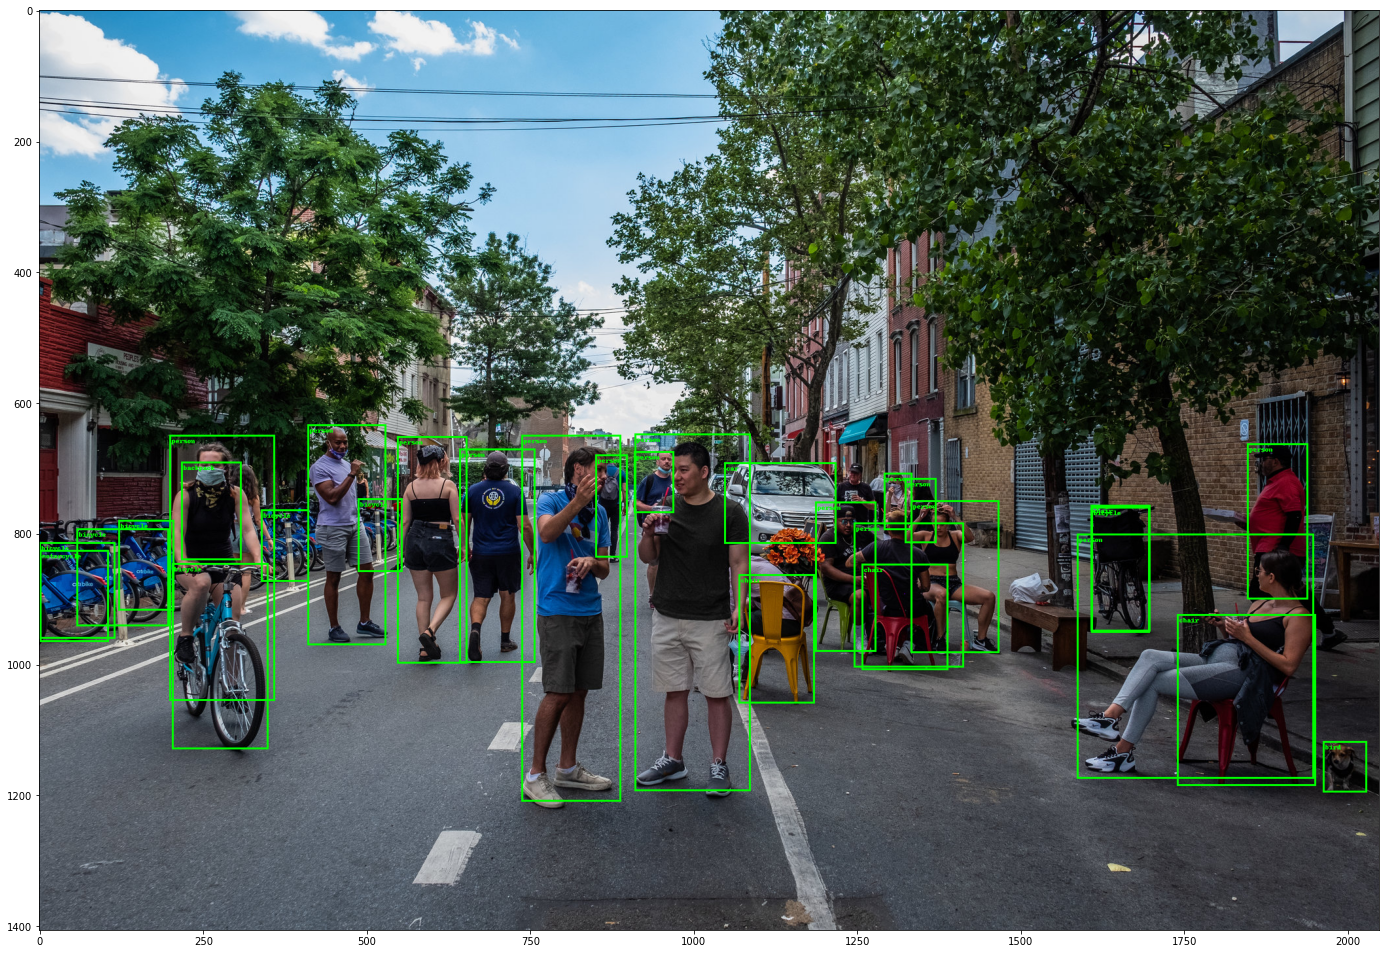

In [ ]:
%matplotlib inline
plt.figure(figsize=(24,30))
plt.imshow(img_final)
plt.show()